<a href="https://colab.research.google.com/github/kmvenkatesh04/Data-Science-Engg/blob/master/Sem3/NLP/Sentiment_Analysis/Assignment1_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import spacy
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import re
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english'))
nlp=spacy.load('en_core_web_sm')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
amazonloc = '/content/amazon_cells_labelled.txt'

In [5]:
amazon = pd.read_csv(amazonloc, delimiter = "\t", header = None,names=["text", "class"])

In [6]:
def PreprocessTxt(textin,lower = True, PunctRem = True, Stopword = True):
  if lower == True: #To change the text to lower case
    temp = textin.lower()
  else:
    temp = textin
  if PunctRem == True: # To remove punctuations
    temp = re.sub(r'[^\w\s]', '', temp)
  if Stopword == True: #Removing stopwords
    word_tokens = word_tokenize(temp)
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    textout = ' '.join(filtered_sentence) # Join to make list a sentence
  else:
    textout = temp
  return textout

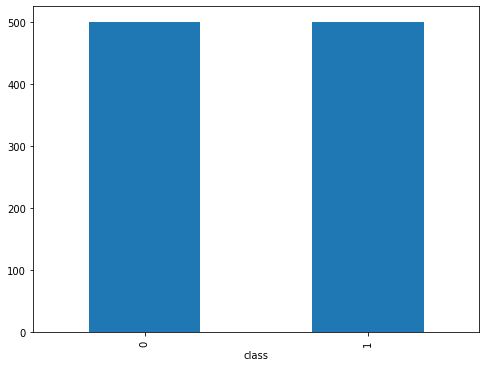

In [8]:
fig = plt.figure(figsize=(8,6)) # To check if the class is imbalanced
amazon.groupby('class')['text'].count().plot.bar(ylim=0)
plt.show()

In [9]:
amazon['CleanTxt'] = amazon.apply(lambda x: PreprocessTxt(x['text']), axis = 1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(amazon['CleanTxt'], amazon['class'],test_size = 0.35, random_state = 4)
mnb = Pipeline([('vect', CountVectorizer()),
               ('clf', MultinomialNB()),])

In [11]:
mnb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [12]:
y_pred = mnb.predict(X_test)

In [13]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.7657142857142857
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       163
           1       0.76      0.82      0.79       187

    accuracy                           0.77       350
   macro avg       0.77      0.76      0.76       350
weighted avg       0.77      0.77      0.76       350



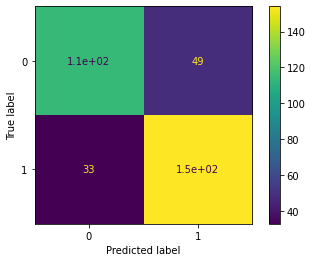

In [23]:
plot_confusion_matrix(mnb,X_test,y_test)

Text(0.5, 1.0, 'Confusion Matrix')

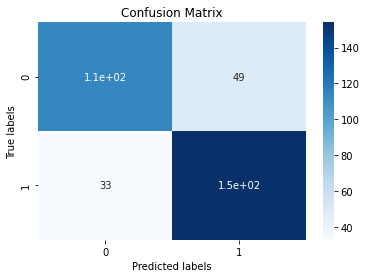

In [19]:
cm = confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True,cmap='Blues',ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_ylim(2.000, 0)
ax.set_title('Confusion Matrix')

In [38]:
for i in amazon['text'][:5]:
  print('****************************************************************')
  print('\nparts of speech for \n"{}": \n{}\n'.format(i,nltk.pos_tag(word_tokenize(i))))

****************************************************************

parts of speech for 
"So there is no way for me to plug it in here in the US unless I go by a converter.": 
[('So', 'RB'), ('there', 'EX'), ('is', 'VBZ'), ('no', 'DT'), ('way', 'NN'), ('for', 'IN'), ('me', 'PRP'), ('to', 'TO'), ('plug', 'VB'), ('it', 'PRP'), ('in', 'IN'), ('here', 'RB'), ('in', 'IN'), ('the', 'DT'), ('US', 'NNP'), ('unless', 'IN'), ('I', 'PRP'), ('go', 'VBP'), ('by', 'IN'), ('a', 'DT'), ('converter', 'NN'), ('.', '.')]

****************************************************************

parts of speech for 
"Good case, Excellent value.": 
[('Good', 'JJ'), ('case', 'NN'), (',', ','), ('Excellent', 'NNP'), ('value', 'NN'), ('.', '.')]

****************************************************************

parts of speech for 
"Great for the jawbone.": 
[('Great', 'NNP'), ('for', 'IN'), ('the', 'DT'), ('jawbone', 'NN'), ('.', '.')]

****************************************************************

parts of speech 

Dependency Parser for the text

In [43]:
text='He sends down flaming oil barrels and ultimately delivers the blow that sends the wildlings retreating by swinging a huge scythe across the Wall, causing the ice to break and sending many falling to their deaths.'

for token in nlp(text):
 print(token.text,'=>',token.dep_,'=>',token.head.text)

He => nsubj => sends
sends => ROOT => sends
down => prt => sends
flaming => amod => barrels
oil => compound => barrels
barrels => dobj => sends
and => cc => sends
ultimately => advmod => delivers
delivers => conj => sends
the => det => blow
blow => dobj => delivers
that => nsubj => sends
sends => relcl => blow
the => det => wildlings
wildlings => dobj => sends
retreating => advcl => sends
by => prep => delivers
swinging => pcomp => by
a => det => scythe
huge => amod => scythe
scythe => dobj => swinging
across => prep => scythe
the => det => Wall
Wall => pobj => across
, => punct => swinging
causing => advcl => swinging
the => det => ice
ice => nsubj => break
to => aux => break
break => ccomp => causing
and => cc => break
sending => conj => break
many => dobj => sending
falling => dobj => sending
to => prep => falling
their => poss => deaths
deaths => pobj => to
. => punct => sends
